---
title: Atomic potentials
author: Toma Susi
date: 2023/08/23
---

In [12]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np 

import abtem
from ase import Atoms

## Parametrized potentials

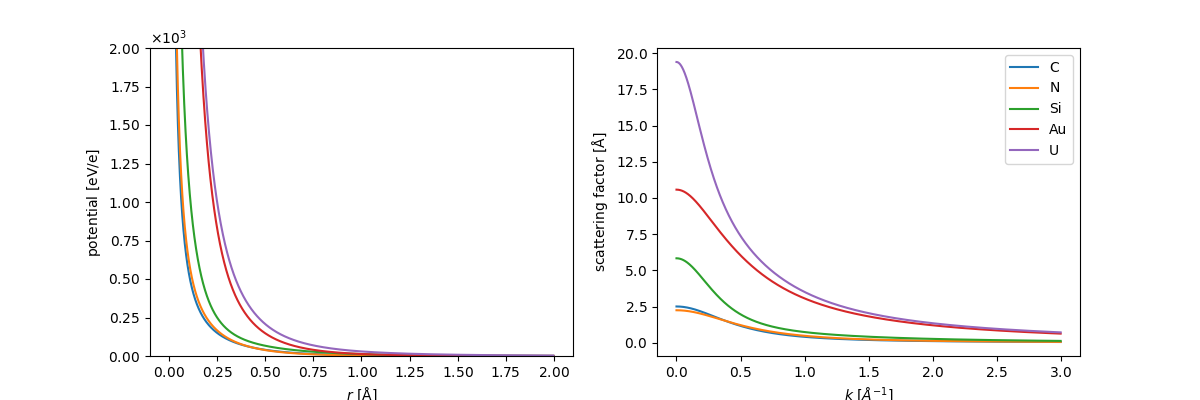

In [22]:
#| label: parametrized_potentials
symbols = ["C", "N", "Si", "Au", "U"]

parametrization = abtem.parametrizations.LobatoParametrization()

potentials = parametrization.line_profiles(symbols, cutoff=2, name="potential")
scattering_factor = parametrization.line_profiles(
    symbols, cutoff=3, name="scattering_factor"
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
visualization = potentials.show(ax=ax1)
visualization.set_ylim([0, 2e3])

scattering_factor.show(legend=True, ax=ax2);

In [36]:
pots = []
scat = []
symb = []

parametrization = abtem.parametrizations.LobatoParametrization()

for Z in range(33)[1:]:
    atoms = Atoms(numbers=[Z])
    
    potential = parametrization.line_profiles(atoms.symbols[0], cutoff=2, name="potential")
    scattering_factor = parametrization.line_profiles(
    atoms.symbols[0], cutoff=3, name="scattering_factor"
    )
    pots.append(potential)
    scat.append(scattering_factor)
    symb.append(atoms.symbols[0])

In [37]:
potentials2 = abtem.stack(pots, symb)
scattering_factors2 = abtem.stack(scat, symb)

In [38]:
potentials2.show(interact=True)

/Users/tomasusi/git/abTEM/abtem/visualize.py:398: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


## Comparison of potentials for H atom

In [17]:
from ase import Atoms
from ase.units import Bohr
from numpy import pi, exp

q = 1.602176*10**-19; # Coulomb constant
eps0 = 8.854188*10**-12; # Dielectric constant

In [18]:
# Size of the unit cell (Ångstrom)
a = 8.0

# Defining a single H atom at the corner of the cell.
atoms = Atoms('H', positions=[(0,0,0)], cell=(a, a, a))

In [118]:
# Loading a radial line profile calculated for this atom with GPAW.
line_dft = np.load('data/H_atom_radial_potential_DFT.npy')

In [120]:
# Exact solution of the electrostatic potential of hydrogen converted to Ångström.

r = np.linspace(0, atoms.cell[0,0], line_dft.shape[0]) # Radial grid to match the DFT
y = q / (4 * pi * eps0) * (exp(-2 * r / Bohr) / r + exp(-2 * r / Bohr) / Bohr)  * 1e10;

/var/folders/8n/_v135h7x4dl2wfy0q4r_f7kh0000gp/T/ipykernel_77727/264708648.py:4: RuntimeWarning: divide by zero encountered in divide
  y = q / (4 * pi * eps0) * (exp(-2 * r / Bohr) / r + exp(-2 * r / Bohr) / Bohr)  * 1e10;


In [127]:
# Loading the Kirkland IAM potential from abTEM.
parametrization = abtem.parametrizations.KirklandParametrization()
potential = parametrization.potential('H')
line_iam = potential(r) # Radial potential matching given grid.

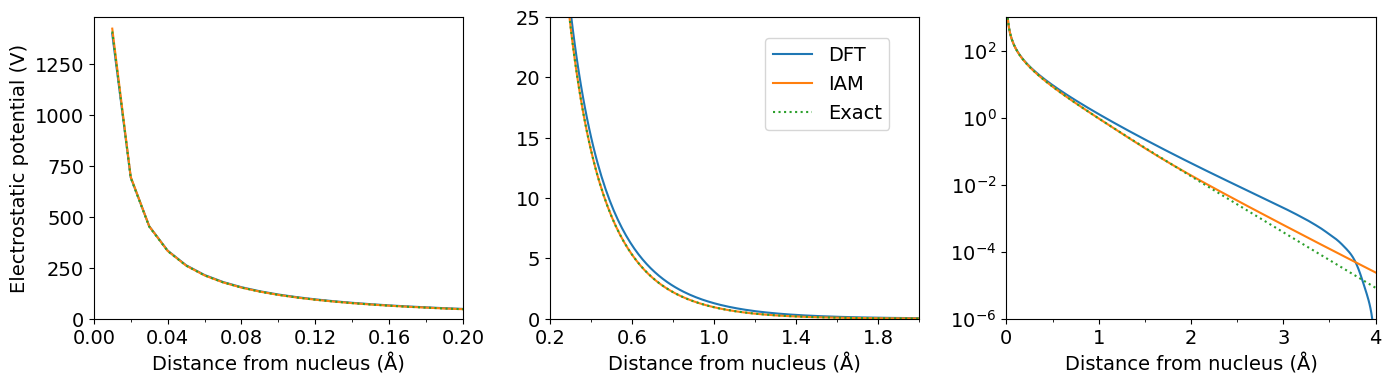

In [128]:
#| label: H_potential_comparisons
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Plotting the comparison between the three models.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,4))
fig.tight_layout(pad=1.6)

ax1.set_xlim((0.0,0.2));
ax1.set_ylim((0,y[1]*1.05));
ax1.plot(r[1:], line_dft[1:], label='DFT')
ax1.plot(r[1:], line_iam[1:], label='IAM')
ax1.plot(r[1:], y[1:], label='Exact', linestyle=':');
ax1.set_xlabel('Distance from nucleus (Å)')
ax1.set_ylabel('Electrostatic potential (V)')
ax1.set_xticks(np.arange(0,0.24,0.04))
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))

ax2.set_xlim((0.2,2.0));
ax2.set_ylim((0.0,25.0));
ax2.plot(r[1:], line_dft[1:])#, label='DFT')
ax2.plot(r[1:], line_iam[1:])#, label='IAM')
ax2.plot(r[1:], y[1:], linestyle=':')#, label='Exact');
ax2.set_xlabel('Distance from nucleus (Å)')
ax2.set_xticks(np.arange(0.2,2.2,0.4))
ax2.xaxis.set_minor_locator(MultipleLocator(0.2))

ax3.set_xlim((0.0,4.0));
ax3.set_ylim((0.000001,1000));
ax3.plot(r[1:], line_dft[1:])#, label='DFT')
ax3.plot(r[1:], line_iam[1:])#, label='IAM')
ax3.plot(r[1:], y[1:], linestyle=':')#, label='Exact');
ax3.set_yscale('log')
ax3.set_xlabel('Distance from nucleus (Å)')
ax3.xaxis.set_minor_locator(MultipleLocator(0.5))

fig.legend(loc=(0.55,0.66));
plt.rcParams['font.size'] = 14